# CS3319-02 - Lab 1
## node2vec & GNN

## 1 node2vec
[Node2Vec](https://dl.acm.org/doi/abs/10.1145/2939672.2939754) is a random-walk based network embedding method, It proposes a biased random walk procedure, which efficiently explores diverse neighborhoods. The generated embeddings can be used for downstream tasks such as node classification, clustering, and community detection.

### Setup

First of all, we install the [nodevectors library](https://github.com/VHRanger/nodevectors) which offers a fast implementation of the node2vec method.

If you are curious to learn how to implement fast random walks on graphs, you are recommanded to read [the blog post](https://www.singlelunch.com/2019/08/01/700x-faster-node2vec-models-fastest-random-walks-on-a-graph/) which explains some of the design choices behind this library.

In [2]:
# Due to the significant internal refactoring of gensim 4.0.1, we need to degrade it for consistency
!pip install gensim==3.6.0
!pip install nodevectors

     |████████████████████████████████| 23.1 MB 11.1 MB/s            
  Preparing metadata (setup.py) ... done
  Created wheel for gensim: filename=gensim-3.6.0-cp37-cp37m-linux_x86_64.whl size=24612933 sha256=fdd7ada3a2e0fbf66355e440588282b9d9552250611d290a3184627cf0031df0
  Stored in directory: /root/.cache/pip/wheels/53/c8/f9/afb722099bdb5d73e5807019ce1512fd065502ccc15ea2b5bd
Successfully built gensim
  Attempting uninstall: gensim
    Found existing installation: gensim 4.0.1
    Uninstalling gensim-4.0.1:
      Successfully uninstalled gensim-4.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scattertext 0.1.5 requires gensim>=4.0.0, but you have gensim 3.6.0 which is incompatible.
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for nodevectors: filename=nodevectors-0.1.23-py3-none-any.whl size=17951 sha

We now import the library, and create a small wrapper class which will expose only the few hyperparameters we may need to tune in this task.

In [3]:
# Common libraries may be used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

# Libaries for graph processing
import nodevectors
import networkx as nx

class Node2Vec(nodevectors.Node2Vec):
    """
    Parameters
    ----------
    p : float
        p parameter of node2vec
    q : float
        q parameter of node2vec
    d : int
        dimensionality of the embedding vectors
    w : int
        length of each truncated random walk
    """
    def __init__(self, p = 1, q = 1,d = 32, w = 10):
        super().__init__(
                    n_components = d,
                    walklen = w,
                    epochs = 50,
                    return_weight = 1.0 / p,
                    neighbor_weight = 1.0 / q,
                    threads = 0,
                    w2vparams = {'window': 4,
                                'negative': 5, 
                                'iter': 10,
                                'ns_exponent': 0.5,
                                'batch_words': 128})

### Example

Now we will study the behavior of node2vec on [barbell graphs](https://en.wikipedia.org/wiki/Barbell_graph).

Below you can see a toy example of a barbell graph generated with NetworkX.

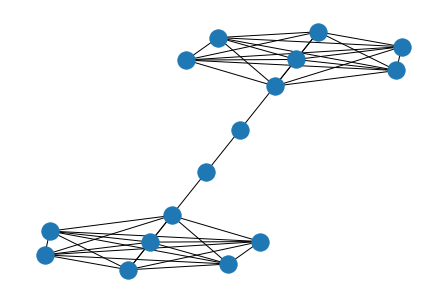

In [4]:
# A toy example, not for your task
toy_barbell = nx.barbell_graph(7, 2)
nx.draw_kamada_kawai(toy_barbell)

We can embed the nodes into 2-dimensional vectors using ```node2vec```, the example code is as follows:

In [5]:
# Use Node2Vec class to embed nodes
n2v = Node2Vec(p = 1, q = 1, d = 2)
n2v.fit(toy_barbell)
embeddings = []
for node in toy_barbell.nodes:
    embeddings.append(list(n2v.predict(node)))   

Making walks... Done, T=3.07
Mapping Walk Names... Done, T=0.03
Training W2V... WARNING: gensim word2vec version is unoptimizedTry version 3.6 if on windows, versions 3.7 and 3.8 have had issues
Done, T=0.16


<AxesSubplot:xlabel='x', ylabel='y'>

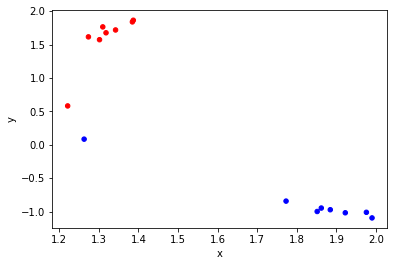

In [6]:
# Construct a pandas dataframe with the 2D embeddings from node2vec.
# We can easily divide the nodes into two clusters, and the groudtruth is denoted by distinct colors.
toy_colors = ['red'] * 8 + ['blue'] * 8
df = pd.DataFrame(embeddings, columns = ['x', 'y']) # Create pandas dataframe from the list of node embeddings
df.plot.scatter(x = 'x', y = 'y', c = toy_colors)

Then we can visualize the 2-dimensional embeddings through a scatter plot. If our example is trained correctly, you should notice two distinct clusters (one with red color, the other with blue). This is a naive example showing the graph structure feature extraction capability of node2vec.

You can tune the hyperparameters ```p```, ```q``` and ```w```, and notice how they affect the resulting embeddings.

### Your Task

Here is a larger barbell graph, where each complete graph has exactly 1000 nodes, and the path length between the complete graphs is equal to 1 (i.e., all the nodes in the barbell graph belong to either one of the two complete graphs, and the connecting path does not have any internal node).

Then, you need to learn node2vec embeddings on this graph, setting ```p = 1, q = 1, d = 10``` and ```w = 10```.

In [7]:
# A barbell graph for your task 2.1
barbell_1 = nx.barbell_graph(1000, 0)

In [8]:
# Your code here, you can add cells if necessary
n2v_1 = Node2Vec(p = 1, q = 1, d = 10, w = 10)
n2v_1.fit(barbell_1)
embeddings_1 = []
for node in barbell_1.nodes:
    embeddings_1.append(list(n2v_1.predict(node)))   

Making walks... Done, T=0.41
Mapping Walk Names... Done, T=1.37
Training W2V... WARNING: gensim word2vec version is unoptimizedTry version 3.6 if on windows, versions 3.7 and 3.8 have had issues
Done, T=22.61


Write a function that takes as input a node id ```n``` in the graph (e.g., ```5```) and returns a list containining the [cosine similarity](https://en.wikipedia.org/wiki/Cosine_similarity) between the node2vec vector of the input node ```n``` and all the nodes in the given barbell graph (including the similarity with ```n``` itself). You can choose a specific node and output your results.

In [9]:
# Your code here, you can add cells if necessary
from sklearn.metrics.pairwise import cosine_similarity
def get_cos_sim(n = 5):
    cos_sim_list = []
    for i, embed in enumerate(embeddings_1):
        sim = cosine_similarity(np.array(embeddings_1[n]).reshape(1,-1), np.array(embed).reshape(1,-1))
        cos_sim_list.append(sim)
    
    return cos_sim_list

get_cos_sim(5)

[array([[0.9520069]], dtype=float32),
 array([[0.97480726]], dtype=float32),
 array([[0.9746632]], dtype=float32),
 array([[0.97235525]], dtype=float32),
 array([[0.9734361]], dtype=float32),
 array([[1.]], dtype=float32),
 array([[0.9580818]], dtype=float32),
 array([[0.99077463]], dtype=float32),
 array([[0.9770653]], dtype=float32),
 array([[0.9560886]], dtype=float32),
 array([[0.9757517]], dtype=float32),
 array([[0.9520306]], dtype=float32),
 array([[0.9771338]], dtype=float32),
 array([[0.9721232]], dtype=float32),
 array([[0.97846913]], dtype=float32),
 array([[0.9795614]], dtype=float32),
 array([[0.9670829]], dtype=float32),
 array([[0.9682284]], dtype=float32),
 array([[0.97873634]], dtype=float32),
 array([[0.97606325]], dtype=float32),
 array([[0.97431153]], dtype=float32),
 array([[0.98377246]], dtype=float32),
 array([[0.97484326]], dtype=float32),
 array([[0.9588651]], dtype=float32),
 array([[0.9781705]], dtype=float32),
 array([[0.98849845]], dtype=float32),
 array([[

Then we generate another barbell graph, this time adding a path of length ```51``` between the two complete graphs. To find out how, refer to the NetworkX documentation: https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.classic.barbell_graph.html#networkx.generators.classic.barbell_graph

You need to learn the node2vec embeddings for the nodes of this new graph, and tune the hyperparameters to get two distinct clusters in the scatter plot. Since the scatter plot only visualize 2-dimensional vectors, if you set ```d >= 3```, you may need some additional dimensionality reduction methods (e.g., [PCA](https://blog.paperspace.com/dimension-reduction-with-principal-component-analysis/), [MDS](https://blog.paperspace.com/dimension-reduction-with-multi-dimension-scaling/) and [t-SNE](https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf?fbclid=IwAR0Bgg1eA5TFmqOZeCQXsIoL6PKrVXUFaskUKtg6yBhVXAFFvZA6yQiYx-M)) to generate visual results. See [t-SNE in sklearn library](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) for applying t-SNE.

In [4]:
# A barbell graph for your task 2.2
barbell_2 = nx.barbell_graph(1000, 50)

In [5]:
n2v_2 = Node2Vec(p = 1, q = 2, d = 16, w = 10)
n2v_2.fit(barbell_2)
embeddings_2 = []
for node in barbell_2.nodes:
    embeddings_2.append(list(n2v_2.predict(node)))  

Making walks... Done, T=750.97
Mapping Walk Names... Done, T=2.06
Training W2V... WARNING: gensim word2vec version is unoptimizedTry version 3.6 if on windows, versions 3.7 and 3.8 have had issues
Done, T=40.18


<AxesSubplot:xlabel='x', ylabel='y'>

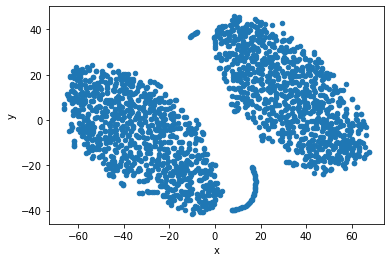

In [6]:
# Your code here, you can add cells if necessary
from sklearn.manifold import TSNE
X = np.array(embeddings_2)
X_embedded = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=20).fit_transform(X)

df = pd.DataFrame(X_embedded, columns = ['x', 'y']) # Create pandas dataframe from the list of node embeddings
df.plot.scatter(x = 'x', y = 'y')


## 2 Graph Neural Network
Now, we will work to construct our own graph neural network using Deep Graph Library (DGL, tutorial: ) and then apply that model on an Open Graph Benchmark (OGB) dataset. OGB datasets will be used to benchmark your model's performance on a graph-based tasks: node property prediction, predicting properties of single nodes.

We will load and inspect one of the Open Graph Benchmark (OGB) datasets by using the `ogb` package. OGB is a collection of realistic, large-scale, and diverse benchmark datasets for machine learning on graphs (reference: https://ogb.stanford.edu/). The `ogb` package not only provides data loaders for each dataset but also model evaluators.

Lastly, we will build our own graph neural network using PyTorch. We will then train and evaluate our model on the OGB node property prediction task.

**Note**: Make sure to **sequentially run all the cells in each section**, so that the intermediate variables / packages will carry over to the next cell.

We recommend you run this notebook on your devices (or on HPC server) so you don't lose progress!

HF & GL!

# Device in Kaggle
You might need to use a GPU for this lab to run quickly.

Please click `More` (in the upper right corner, the "three dots" icon) or `Notebook options` tab and then `Accelerator`. Then choose **GPU**.

However, Kaggle GPU platform seems to have bad compatibility with externally installated packages, so we recommend you to run the code locally or on HPC server, and submit the notebook (with all outputs print).

# Device in local / HPC server
This is the recommended environment:
* python >= 3.8.1
* torch == 1.11.0
* dgl == 1.0.2
* cudatoolkit == 11.3

For HPC server, run the following code in the terminal to quickly obtain the appropriate environment:

In [ ]:
# Do not run this cell, this is for environment configuration
# Environment name "my-env" can be changed

$ module load miniconda3
$ conda init
$ conda create -n my-env
$ source activate my-env
$ conda install pytorch torchvision torchaudio cudatoolkit=11.3 -c pytorch
$ conda install -c dglteam/label/cu113 dgl
$ pip install ogb

# Setup
First let us check which version of PyTorch you are running.

In [7]:
import torch
import os
print("PyTorch has version {}".format(torch.__version__))

# In Kaggle, if you use CPU, the output will be:
#        PyTorch has version 1.9.1+cpu
#If you use GPU, the output will be:
#        PyTorch has version 1.9.1

PyTorch has version 1.9.1+cpu


## Kaggle only (DO NOT run on HPC server)
Download the necessary packages for DGL. Make sure that your version of torch matches the output from the cell above. In case of any issues, more information can be found on the [dgl's installation page](https://www.dgl.ai/pages/start.html).

In [11]:
# ATTENTION: Only run in Kaggle, availability not guaranteed
# Install dgl w/o cuda
# In Kaggle, the installation will take some time, and each time you restart the notebook without saving, you need to re-run this cell.
# So it is recommanded that you "save version" after successful installation.

if torch.cuda.is_available():
# GPU enabled
    !pip install  dgl -f https://data.dgl.ai/wheels/cu113/repo.html
    !pip install  dglgo -f https://data.dgl.ai/wheels-test/repo.html
else:
# just use CPU
    !pip install  dgl -f https://data.dgl.ai/wheels/repo.html
    !pip install  dglgo -f https://data.dgl.ai/wheels-test/repo.html
    
!pip install ogb

Looking in links: https://data.dgl.ai/wheels/repo.html
Looking in links: https://data.dgl.ai/wheels-test/repo.html


# Open Graph Benchmark (OGB)

The Open Graph Benchmark (OGB) is a collection of realistic, large-scale, and diverse benchmark datasets for machine learning on graphs. Its datasets are automatically downloaded, processed, and split using the OGB Data Loader. The model performance can then be evaluated by using the OGB Evaluator in a unified manner.

## Dataset and Data

OGB also supports DGL dataset and data classes. Here we take a look on the `ogbn-arxiv` dataset.

In [10]:
os.environ['DGLBACKEND'] = 'pytorch'
import dgl
from dgl.dataloading import DataLoader
from ogb.nodeproppred import DglNodePropPredDataset
import dgl.nn as dglnn
import dgl.function as fn
import torch.nn as nn
import torch.nn.functional as F

def splitIndex2mask(idx, length):
    mask = []
    pos = 0
    l = len(idx)
    for i in range(length):
        if pos < l and i == idx[pos]:
            mask.append(True)
            pos += 1
        else:
            mask.append(False)
    return torch.Tensor(mask) > 0

dataset = DglNodePropPredDataset(name='ogbn-arxiv')
split_idx = dataset.get_idx_split()
device = 'cuda' if torch.cuda.is_available() else 'cpu'
# If you use GPU, the device should be cuda
print('Device: {}'.format(device))

g, labels = dataset[0]
g.ndata['label'] = labels.flatten()
g.ndata["train_mask"] = splitIndex2mask(split_idx['train'], len(labels))
g.ndata['val_mask'] = splitIndex2mask(split_idx['valid'], len(labels))
g.ndata['test_mask'] = splitIndex2mask(split_idx['test'], len(labels))
# You can add any preprocessing over the graph here
##################### Optional #####################

####################################################

# acquire labels with spilt_idx, for optional usage
train_label = dataset.labels[split_idx['train']]
valid_label = dataset.labels[split_idx['valid']]
test_label = dataset.labels[split_idx['test']]

# Extract the graph
print(g)

RuntimeError: DGL requires PyTorch >= 1.13.0

## GNN Model

Now we will implement our GNN model!

Please follow the tutorial of DGL(https://docs.dgl.ai/en/0.8.x/api/python/nn-pytorch.html), choose one type of `GraphConv` layer as the backbone and implement the `GNN` model.

Hint: to obtain better performance, you can stack multiple `GraphConv` layers again with [Batch Normalization](https://arxiv.org/pdf/1502.03167). 

In [ ]:
class GNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers,
                 dropout, return_embeds=False):
        # TODO: Implement a function that initializes self.convs, 
        # self.bns, and self.softmax.

        super(GNN, self).__init__()

        # A list of GraphConv layers
        self.convs = None

        # A list of 1D batch normalization layers
        self.bns = None

        # The log softmax layer
        self.softmax = None

        ############# Your code here ############
        ## Note:
        ## 1. You'd better use torch.nn.ModuleList for self.convs and self.bns
        ## 2. self.convs has num_layers GraphConv layers
        ## 3. Choose any type of GraphConv layers you like, such as 'SAGEConv', 'GATConv', etc.
        ## 4. self.bns has num_layers - 1 BatchNorm1d layers
        ## 5. You can use torch.nn.LogSoftmax for self.softmax
        ## 6. The parameters you can set for GraphConv include 'in_channels' and 
        ## 'out_channels'.
        ## 7. The only parameter you need to set for BatchNorm1d is 'num_features'
        ## For more information please refer to the documentation: 
        ## https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm1d.html
        ## (~10 lines of code)

        #########################################

        # Probability of an element getting zeroed
        self.dropout = dropout

        # Skip classification layer and return node embeddings
        self.return_embeds = return_embeds

    def reset_parameters(self):
        for conv in self.convs:
            conv.reset_parameters()
        for bn in self.bns:
            bn.reset_parameters()

    def forward(self, g, x):
        # TODO: Implement a function that takes the feature tensor x and
        # edge_index tensor adj_t and returns the output tensor.

        out = None

        ############# Your code here ############
        ## Note:
        ## 1. Construct the network
        ## 2. torch.nn.functional.relu and torch.nn.functional.dropout are useful
        ## For more information please refer to the documentation:
        ## https://pytorch.org/docs/stable/nn.functional.html
        ## 3. Don't forget to set F.dropout training to self.training
        ## 4. If return_embeds is True, then skip the last softmax layer
        ## (~7 lines of code)

        #########################################

        return out

In [ ]:
import copy

def train(model, g, optimizer, loss_fn, max_epoch):
    # TODO: Implement a function that trains the model by 
    # using the given optimizer and loss_fn.
    loss = 0
    best_val_acc = 0
    
    features = g.ndata["feat"]
    labels = g.ndata["label"]
    train_mask = g.ndata["train_mask"]
    val_mask = g.ndata["val_mask"]
    test_mask = g.ndata["test_mask"]
    
    for e in range(max_epoch):
        
        ############# Your code here ############
        ## Note:
        ## 1. Feed the data into the model and compute prediction
        ## 2. Feed the sliced output and label to loss_fn
        ## 3. Compute accuracy on training/validation set
        ## (~4 lines of code)

        #########################################

        # Save the best validation accuracy and the corresponding best model.
        if best_val_acc < val_acc:
            best_val_acc = val_acc
            best_model = copy.deepcopy(model)

        # Backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if e % 5 == 0:
            print(
                "In epoch {}, loss: {:.3f}, val acc: {:.3f} (best {:.3f})".format(
                    e, loss, val_acc, best_val_acc
                )
            )
    return best_model, best_val_acc

# Test function here
@torch.no_grad()
def test(model, g):
    # TODO: Implement a function that tests the model and
    # outputs the test accuracy.
    model.eval()
    features = g.ndata["feat"]
    labels = g.ndata["label"]
    train_mask = g.ndata["train_mask"]
    val_mask = g.ndata["val_mask"]
    test_mask = g.ndata["test_mask"]
    
    # The output of model on all data
    out = None
    
    # test accuracy
    test_acc = 0

    ############# Your code here ############
    ## (~1 line of code)
    ## Note:
    ## 1. Compute accuracy on test set

    #########################################


    return test_acc

In [ ]:
# You can change the args and see what will happen to your work
args = {
    'device': device,
    'num_layers': 2,
    'hidden_dim': 256,
    'dropout': 0.5,
    'lr': 0.01,
    'epochs': 100,
}
args

In [ ]:
# reset the parameters to initial random value
model = GNN(g.ndata["feat"].shape[1], args['hidden_dim'],
            dataset.num_classes, args['num_layers'],
            args['dropout']).to(device)
model.reset_parameters()

optimizer = torch.optim.Adam(model.parameters(), lr=args['lr'])
loss_fn = F.nll_loss

best_model, best_valid_acc = train(model, g, optimizer, loss_fn, args["epochs"])

Run the cell below to see the results of your best model.

In [ ]:
# Test the model and print test accuracy
test_acc = test(model, g)
print(f'Test: {100 * test_acc:.2f}%')